<a href="https://colab.research.google.com/github/Sriharshitha842/ML_LAB/blob/main/ML_lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAME OF THE STUDENT : SRIHARSHITHA DEEPALA**

**REGISTRATION NUMBER : 19BCD7246**

**COURSE CODE : CSE3008**

**LAB NUMBER : 07**

# **KNN Classification Algorithm**

In [59]:
#Import necessary libraries
import math
from pprint import pprint
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [61]:
#Load the dataset
file_columns = ['sepal_len','sepal_width','petal_len','petal_width','class']
data = pd.read_csv('/content/sample_data/Iris.csv',header=None, names=file_columns)
data.head()

,sepal_len,sepal_width,petal_len,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [62]:
#Shuffle the data
data = data.sample(frac=1).reset_index(drop=True)
data['seq'] = data.index
data.head()

,sepal_len,sepal_width,petal_len,petal_width,class,seq
0,4.9,3.1,1.5,0.1,Iris-setosa,0
1,6.2,3.4,5.4,2.3,Iris-virginica,1
2,6.3,3.3,6.0,2.5,Iris-virginica,2
3,6.8,2.8,4.8,1.4,Iris-versicolor,3
4,4.9,3.0,1.4,0.2,Iris-setosa,4


In [63]:
#split dataset into train and test data
dev_size = int(data.shape[0]*0.70)
test_size = int(data.shape[0]*0.30)

# Take first 70% of the data as dev set
dev = data[:dev_size]

# Take last 30% of the data as test set
test = data[test_size:]

In [64]:
# Euclidean distance method
def get_euclidean(row1, row2):
    return math.sqrt(sum([(x1-x2)**2 for x1,x2 in zip(row1,row2)]))

In [65]:
#calculate distance between every point in the dataset and every other point
dev2 = dev.values
eud = []
l = len(dev2)
for i in range(l):
    eu_distance = []
    for j in range(l):
        if(i!=j):
            index = dev2[j][5]
            ed = get_euclidean(dev2[i][:-2], dev2[j][:-2])
            
            eu_distance.append((ed, index))
    eu_distance.sort(key= lambda x: x[0])
    eu_distance = [i[1] for i in eu_distance]
    eud.append(eu_distance)
dev['euclidean'] = eud

In [66]:
#k closest neighbors are selected for every point in the dev set.
def get_nearest(row, distance_measure,k):
    return row[distance_measure][:k]

In [67]:
#Among the K nearest neighbors, the dominant class is elected and the data point is classified to belong to this class.
def get_dominant_class(df, neighbors):
    classes = df[df['seq'].isin(neighbors)]['class']
    return classes.value_counts().index[0]

In [68]:
#Optimize K
k = 1
hyper_params = []
acc = {1: {}, 3:{}, 5:{}, 7:{}}

while k <= 7:
    dev['eud_{}'.format(k)] = dev.apply(lambda x: get_nearest(x, 'euclidean',k), axis=1)
    dev['eud_{}_class'.format(k)] = dev['eud_{}'.format(k)].apply(lambda row: get_dominant_class(dev, row))
    hyper_params.append('eud_{}_class'.format(k))
    acc[k]['eud'] = dev[dev['class']==dev['eud_{}_class'.format(k)]].shape[0]/dev.shape[0]
    k+=2

In [69]:
#Observe various hyper parameters
cols = ['class'] + hyper_params
dev[cols].head()

,class,eud_1_class,eud_3_class,eud_5_class,eud_7_class
0,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
1,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica
2,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica
3,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor
4,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa


In [70]:
pprint(acc)

{1: {'eud': 0.9428571428571428},
 3: {'eud': 0.9523809523809523},
 5: {'eud': 0.9619047619047619},
 7: {'eud': 0.9619047619047619}}


In [71]:
#Calculate euclidean distance between every point in the test dataset 
#with every point in the dev set and pick 3 nearest neighbors
test['seq'] = test.index
test2 = test.values
test_eud = []
l = len(test)
for i in range(l):
    test_eu_distance = []
    for j in range(len(dev)):
        index = dev2[j][5]
        ed = get_euclidean(test2[i][:-2], dev2[j][:-2])
        test_eu_distance.append((ed, index))
        
    test_eu_distance.sort(key= lambda x: x[0])
    test_eu_distance = [i[1] for i in test_eu_distance]
    test_eud.append(test_eu_distance)
    
test['euclidean'] = test_eud

In [72]:
#Since we obtained 3 as optimal value for the hyperparameter k, 
#we find 3 nearest neighbors between every point in the test set
# and every point in the dev set using Euclidean Distance
test['eu'] = test.apply(lambda x: get_nearest(x, 'euclidean',3), axis=1)
test[file_columns+['eu']].head()

,sepal_len,sepal_width,petal_len,petal_width,class,eu
45,4.7,3.2,1.6,0.2,Iris-setosa,"[45, 71, 48]"
46,5.1,3.8,1.9,0.4,Iris-setosa,"[46, 31, 26]"
47,5.4,3.4,1.7,0.2,Iris-setosa,"[47, 60, 62]"
48,4.8,3.4,1.6,0.2,Iris-setosa,"[48, 45, 89]"
49,5.8,4.0,1.2,0.2,Iris-setosa,"[49, 12, 81]"


In [73]:
#Pick the most dominant class among 3 nearest neighbors
test['eu_class'] = test['eu'].apply(lambda row: get_dominant_class(dev, row))
test[file_columns+['eu_class']].head()

,sepal_len,sepal_width,petal_len,petal_width,class,eu_class
45,4.7,3.2,1.6,0.2,Iris-setosa,Iris-setosa
46,5.1,3.8,1.9,0.4,Iris-setosa,Iris-setosa
47,5.4,3.4,1.7,0.2,Iris-setosa,Iris-setosa
48,4.8,3.4,1.6,0.2,Iris-setosa,Iris-setosa
49,5.8,4.0,1.2,0.2,Iris-setosa,Iris-setosa


In [74]:
y_test=test["class"].tolist()

In [75]:
y_pred=test["eu_class"].tolist()

In [76]:
# Accuracy, Confusion Matrix, Classification report of KNN classifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred)*100)
print(classification_report(y_test, y_pred))

[[40  0  0]
 [ 0 31  3]
 [ 0  1 30]]
Accuracy: 96.19047619047619
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       0.97      0.91      0.94        34
 Iris-virginica       0.91      0.97      0.94        31

       accuracy                           0.96       105
      macro avg       0.96      0.96      0.96       105
   weighted avg       0.96      0.96      0.96       105



# **Weighted KNN Algorithm**

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.lines as mlines
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing, metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')

In [79]:
df = pd.read_csv('/content/sample_data/default_data.csv')
df = df.drop(columns=['Index'])

DATA EXPLORATION

In [80]:
#no.of defaults
df['Defaulted?'].value_counts()

0    9667
1     333
Name: Defaulted?, dtype: int64

In [81]:
#Non-default descriptive statistics
df[df['Defaulted?']==0].describe()


,Employed,Bank Balance,Annual Salary,Defaulted?
count,9667.000000,9667.000000,9667.000000,9667.0
mean,0.708596,9647.324961,402793.999321,0.0
std,0.454433,5477.714672,159819.015334,0.0
min,0.000000,0.000000,9263.640000,0.0
25%,0.000000,5588.580000,256860.720000,0.0
50%,1.000000,9634.320000,415073.880000,0.0
75%,1.000000,13539.000000,525885.060000,0.0
max,1.000000,28692.120000,882650.760000,0.0


In [82]:
#descriptive default statistics
df[df['Defaulted?']==1].describe()


,Employed,Bank Balance,Annual Salary,Defaulted?
count,333.000000,333.000000,333.000000,333.0
mean,0.618619,20973.858378,385069.762162,1.0
std,0.486457,4095.198311,165650.649999,0.0
min,0.000000,7828.800000,115965.480000,1.0
25%,0.000000,18139.320000,228330.120000,1.0
50%,1.000000,21469.080000,378184.080000,1.0
75%,1.000000,23866.440000,516807.960000,1.0
max,1.000000,31851.840000,797597.520000,1.0


In [83]:
#visualization
df_sample = df.sample(300)

In [84]:
bal = df_sample['Bank Balance'].to_numpy()
sal = df_sample['Annual Salary'].to_numpy()
emp = df_sample['Employed'].to_numpy()
deflt = df_sample['Defaulted?'].to_numpy()

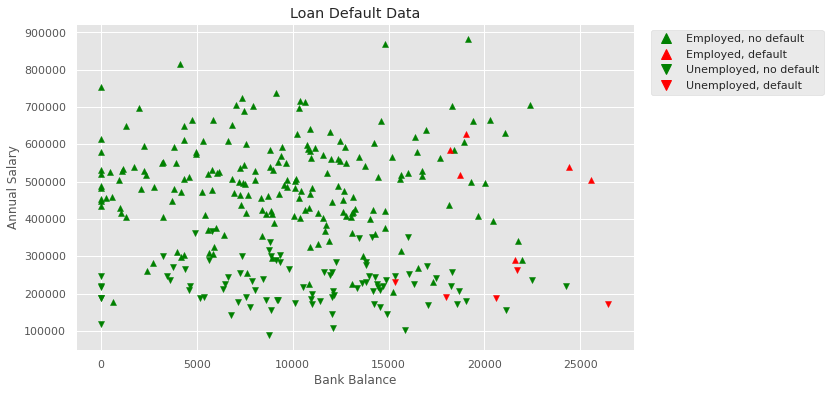

In [85]:
colors = ['green' if i == 0 else 'red' for i in deflt]
markers = ['v' if i == 0 else '^' for i in emp]

green_triangle = mlines.Line2D([], [], color='green', marker='^', linestyle='None', markersize=10, label='Employed, no default')
red_triangle = mlines.Line2D([], [], color='red', marker='^', linestyle='None', markersize=10, label='Employed, default')
green_ups_triangle = mlines.Line2D([], [], color='green', marker='v', linestyle='None', markersize=10, label='Unemployed, no default')
red_ups_triangle = mlines.Line2D([], [], color='red', marker='v', linestyle='None', markersize=10, label='Unemployed, default')

plt.figure(figsize=(10,6))
for x, y, c, m in zip(bal, sal, colors, markers):
    plt.scatter(x, y, c=c, marker=m)
plt.title('Loan Default Data')
plt.xlabel('Bank Balance')
plt.ylabel('Annual Salary')
plt.legend(handles=[green_triangle, red_triangle, green_ups_triangle, red_ups_triangle], bbox_to_anchor=(1.35, 1), loc='best')
plt.show()

MODEL

In [87]:
#Split the dataset
X = df.drop(['Defaulted?'], axis = 1)
y = df['Defaulted?']
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [89]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 3)
(2000, 3)
(8000,)
(2000,)


In [104]:
#Fit the model
k = 29
neigh = KNeighborsClassifier(n_neighbors = k, weights='distance').fit(X_train,y_train)
pred_y = neigh.predict(X_test)
print("Accuracy of model at K =",k," is",metrics.accuracy_score(y_test, pred_y))

Accuracy of model at K = 29  is 0.973


In [105]:
confusion_matrix(y_test, pred_y)

array([[1922,    9],
       [  45,   24]])

Minimum error: 0.0265 at K = 29


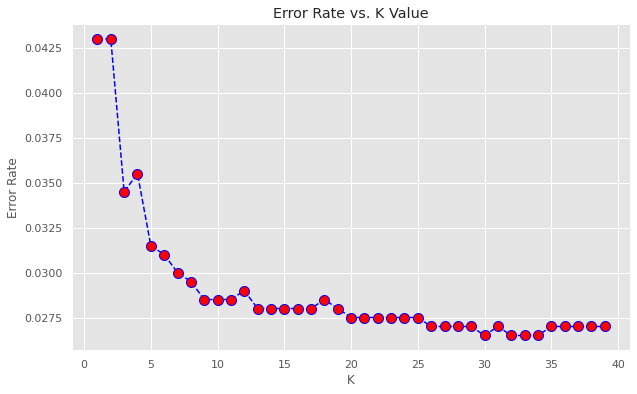

In [106]:
#best value for k
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance')
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy: 0.9735 at K = 29


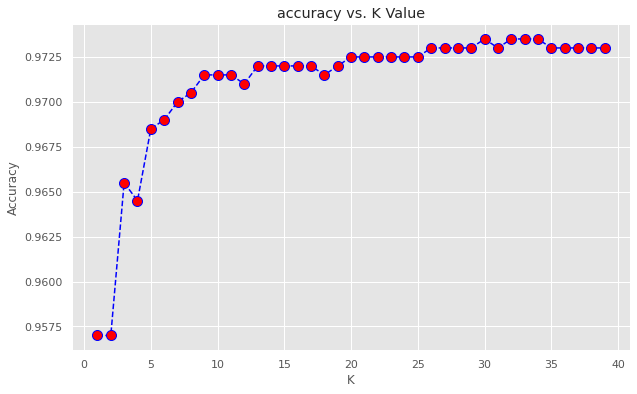

In [107]:
acc = []
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i, weights='distance').fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:",max(acc),"at K =",acc.index(max(acc)))